In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
m = 10000
n = 1000
crop = 10

phi = np.zeros(m)
phi[0] = 1
for k in range(1, m):
    phi[k] = 2.5*k*0.5**k

gam = np.zeros(crop)
for k in range(crop):
    gam[k] = phi[0:m-k] @ phi[k:m]
rhoma = gam/gam[0]
gam, rhoma

(array([5.62962963, 4.9537037 , 3.7962963 , 2.55787037, 1.6087963 ,
        0.9693287 , 0.56712963, 0.32479745, 0.18301505, 0.10181568]),
 array([1.        , 0.87993421, 0.67434211, 0.45435855, 0.28577303,
        0.17218339, 0.10074013, 0.05769428, 0.03250925, 0.01808568]))

In [26]:
m = np.array([[1, -1, 1/4], [-1, 5/4, 0], [1/4, -1, 1]])
rhs = np.array([26/16, 9/16, 1/4])
f3 = np.linalg.solve(m, rhs)
gam = np.zeros(crop)
gam[0] = f3[0]
gam[1] = f3[1]
gam[2] = f3[2]
for k in range(3, crop):
    gam[k] = gam[k-1] - gam[k-2]/4
rhoyw = gam/gam[0]
gam, rhoyw

(array([5.62962963, 4.9537037 , 3.7962963 , 2.55787037, 1.6087963 ,
        0.9693287 , 0.56712963, 0.32479745, 0.18301505, 0.10181568]),
 array([1.        , 0.87993421, 0.67434211, 0.45435855, 0.28577303,
        0.17218339, 0.10074013, 0.05769428, 0.03250925, 0.01808568]))

In [72]:
f3

array([5.62962963, 4.9537037 , 3.7962963 ])

In [42]:
e = np.random.normal(0, 1, n)
eta = np.zeros(n)
eta[0] = e[0]
eta[1] = e[1]
for k in range(2, n):
    eta[k] = e[k] + 0.25*e[k-1] + 0.25*e[k-2]

x = np.zeros(n)
x[0] = eta[0]
x[1] = x[0] + eta[1]
x[2] = x[1] - 0.25*x[0] + eta[2]

for t in range(3, n):
    x[t] = x[t-1] - 0.25*x[t-2] + eta[t]
gam = np.zeros(crop)
for k in range(crop):
    gam[k] = x[0:n-k]@x[k:n]/(n-k)
rhonp = gam/gam[0]
rhonp

array([ 1.        ,  0.88376116,  0.68025415,  0.46774504,  0.29184998,
        0.16229732,  0.0757655 ,  0.02685173,  0.00343231, -0.00665498])

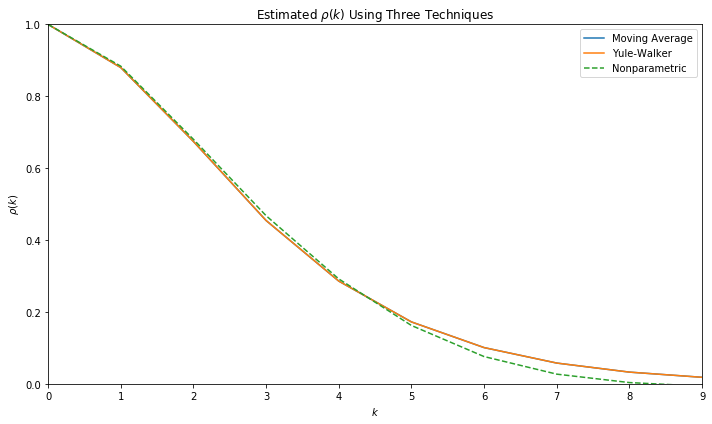

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
kk = np.arange(0,10)
ax.plot(kk, rhoma, label='Moving Average')
ax.plot(kk, rhoyw, label='Yule-Walker')
ax.plot(kk, rhonp, label='Nonparametric', ls='--')
ax.legend()
ax.set_xlim(0, 9)
ax.set_xticks(kk)
ax.set_ylim(0, 1)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\rho(k)$')
ax.set_title('Estimated ' + r'$\rho(k)$' + ' Using Three Techniques')
plt.tight_layout()
plt.savefig('9474hw1p2.jpg', dpi=250)
plt.show()

In [55]:
import pandas as pd
df = pd.read_csv('C:\\Users\\vitan\\Desktop\\anomaly.csv', header=None, names=['raw'])
df

,raw
0,-0.460
1,-0.346
2,-0.329
3,-0.375
4,-0.331
5,-0.312
6,-0.457
7,-0.583
8,-0.444
9,-0.396


In [57]:
df['lag'] = df['raw'].shift(1)
df['fd'] = df['raw'] - df['lag']
df

,raw,lag,fd
0,-0.460,NaN,NaN
1,-0.346,-0.460,0.114
2,-0.329,-0.346,0.017
3,-0.375,-0.329,-0.046
4,-0.331,-0.375,0.044
5,-0.312,-0.331,0.019
6,-0.457,-0.312,-0.145
7,-0.583,-0.457,-0.126
8,-0.444,-0.583,0.139
9,-0.396,-0.444,0.048


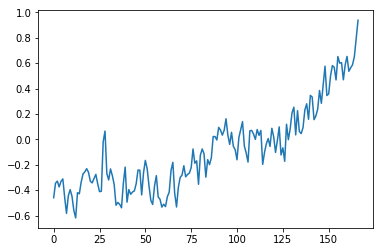

In [62]:
df['raw'].plot()

In [58]:
raw = df['raw'].values
fd = df['fd'].values
fd = fd[1:]
raw, fd

(array([-0.46 , -0.346, -0.329, -0.375, -0.331, -0.312, -0.457, -0.583,
        -0.444, -0.396, -0.449, -0.56 , -0.619, -0.42 , -0.429, -0.337,
        -0.273, -0.256, -0.231, -0.26 , -0.33 , -0.343, -0.31 , -0.276,
        -0.349, -0.412, -0.409, -0.02 ,  0.065, -0.269, -0.32 , -0.233,
        -0.286, -0.355, -0.519, -0.497, -0.512, -0.539, -0.347, -0.219,
        -0.495, -0.396, -0.433, -0.415, -0.406, -0.35 , -0.242, -0.243,
        -0.438, -0.264, -0.166, -0.232, -0.367, -0.481, -0.513, -0.368,
        -0.286, -0.454, -0.472, -0.534, -0.511, -0.53 , -0.452, -0.417,
        -0.246, -0.181, -0.424, -0.533, -0.378, -0.3  , -0.282, -0.208,
        -0.295, -0.277, -0.266, -0.223, -0.076, -0.188, -0.17 , -0.354,
        -0.125, -0.076, -0.113, -0.298, -0.16 , -0.199, -0.145,  0.022,
         0.022, -0.005,  0.094,  0.073,  0.033,  0.072,  0.162,  0.033,
        -0.04 ,  0.055, -0.055, -0.082, -0.161,  0.013,  0.078,  0.139,
        -0.053, -0.108, -0.179,  0.067,  0.07 ,  0.042,  0.   , 

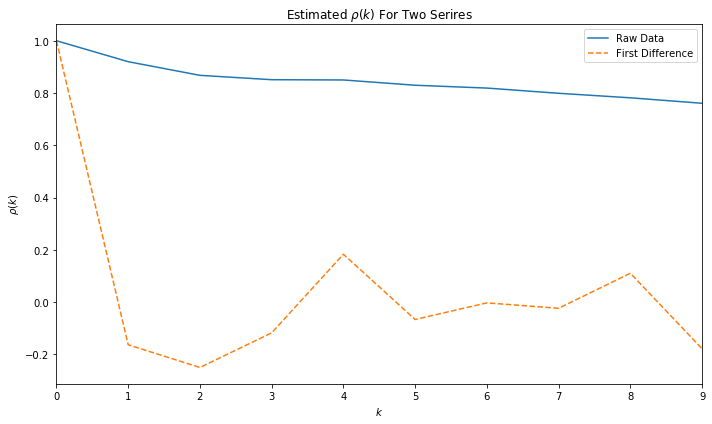

In [61]:
gam_raw = np.zeros(crop)
gam_fd = np.zeros(crop)
n_raw = len(raw)
n_fd = len(fd)
for k in range(crop):
    gam_raw[k] = raw[0:n_raw-k]@raw[k:n_raw]/(n_raw-k)
    gam_fd[k]  = fd[0:n_fd-k]@fd[k:n_fd]/(n_fd-k)
rho_raw = gam_raw/gam_raw[0]
rho_fd  = gam_fd /gam_fd[0]

fig, ax = plt.subplots(figsize=(10, 6))
kk = np.arange(0,10)
ax.plot(kk, rho_raw, label='Raw Data')
ax.plot(kk, rho_fd, label='First Difference', ls='--')
ax.legend()
ax.set_xlim(0, 9)
ax.set_xticks(kk)
#ax.set_ylim(0, 1)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\rho(k)$')
ax.set_title('Estimated ' + r'$\rho(k)$' + ' For Two Serires')
plt.tight_layout()
plt.savefig('9474hw1p3b.jpg', dpi=250)
plt.show()

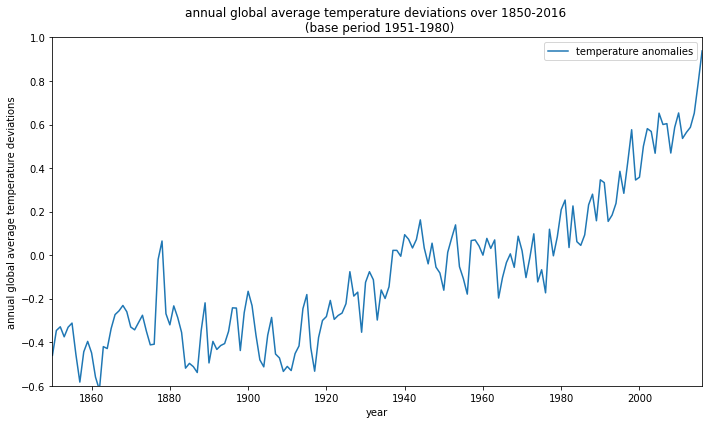

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
kk = np.arange(0,n_raw)
kkk = kk+1850
ax.plot(kkk, df['raw'], label='temperature anomalies')
ax.legend()
ax.set_xlim(1850, 2016)
ax.set_ylim(-0.6, 1)
ax.set_ylabel('annual global average temperature deviations')
ax.set_xlabel('year')
ax.set_title('annual global average temperature deviations over 1850-2016 \n (base period 1951-1980)')
plt.tight_layout()
plt.savefig('9474hw1p3a.jpg', dpi=250)
plt.show()